# 進行資料前處理（Preprocess）


> image reshape (60000, 28, 28, 1): CNN 因為必須先進行卷積與池化 (Max-Pool) 運算, 所以必須保留影像的維度. 因此 60,000 筆的每一筆圖像(28x28)轉換成 28 (長) x 28(寬) x 1(圖像頻道) 的影像單位。



### 資料讀取與轉換

In [1]:
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
import numpy as np

np.random.seed(10)

# Read MNIST data
(X_Train, y_Train), (X_Test, y_Test)=mnist.load_data()

# Translation of data
X_Train4D=X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test4D=X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
print(X_Train4D.shape)
print(y_Train.shape)
print(X_Test4D.shape)
print(y_Test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


### 將 Features 進行標準化與 Label 的 Onehot-encoding

In [3]:
# Standardize feature data
X_Train4D_norm=X_Train4D/255
X_Test4D_norm=X_Test4D/255

# Label Onehot-encoding
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [4]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 建立模型（CNN卷積神經網路）

### 建立 Convolutional layers 與 Pooling layers

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model=Sequential()

# Create CN layer 1
# padding: string, either "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.
# kernel_initializer: Initializer for the convolution kernel. If None, the default initializer ("glorot_uniform") will be used.
# bias_initializer: Initializer for the bias vector. If None, the default initializer ("zeros") will be used.
model.add(Conv2D(filters=16,
                 kernel_size=(5, 5),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))

# Create Max-Pool 1
model.add(MaxPool2D(pool_size=(2, 2)))

# Create CN layer 2
model.add(Conv2D(filters=36,
                 kernel_size=(5, 5),
                 padding='same',
                 activation='relu'))

# Create Max-Pool 2
model.add(MaxPool2D(pool_size=(2, 2)))

# Add Dropout layer
model.add(Dropout(0.25))

### 建立 Fully connected layer, Hidden layer 與 Output layer

In [7]:
# convert (7, 7, 36) image to 1D vector, so 36x7x7 = 1764 neurons in total
model.add(Flatten())

# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()
print("")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

# 進行訓練

### 定義訓練並進行訓練

In [9]:
# set training parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# start training
train_history=model.fit(x=X_Train4D_norm,
                        y=y_TrainOneHot, validation_split=0.2,
                        epochs=10, batch_size=300, verbose=1)

Epoch 1/10
160/160 [==============================] - 68s 406ms/step - loss: 0.5049 - accuracy: 0.8412 - val_loss: 0.1011 - val_accuracy: 0.9705
Epoch 2/10
160/160 [==============================] - 66s 415ms/step - loss: 0.1434 - accuracy: 0.9570 - val_loss: 0.0633 - val_accuracy: 0.9808
Epoch 3/10
160/160 [==============================] - 63s 395ms/step - loss: 0.1011 - accuracy: 0.9697 - val_loss: 0.0510 - val_accuracy: 0.9858
Epoch 4/10
160/160 [==============================] - 62s 390ms/step - loss: 0.0836 - accuracy: 0.9753 - val_loss: 0.0439 - val_accuracy: 0.9880
Epoch 5/10
160/160 [==============================] - 61s 383ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0413 - val_accuracy: 0.9873
Epoch 6/10
160/160 [==============================] - 64s 401ms/step - loss: 0.0606 - accuracy: 0.9821 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 7/10
160/160 [==============================] - 60s 373ms/step - loss: 0.0551 - accuracy: 0.9836 - val_loss: 0.0366 - val_ac

### 畫出 accuracy 執行結果

In [15]:
import matplotlib.pyplot as plt

def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

def plot_images_labels_predict(images, labels, prediction, idx, num=20):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title="l="+str(labels[idx])
        if len(prediction)>0:
            title="l={},p={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title="l={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

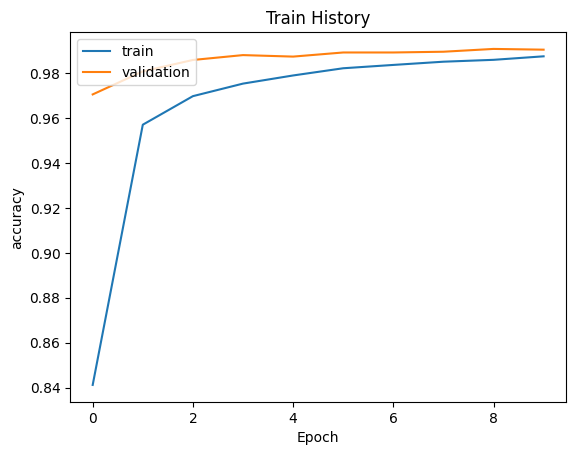

In [11]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

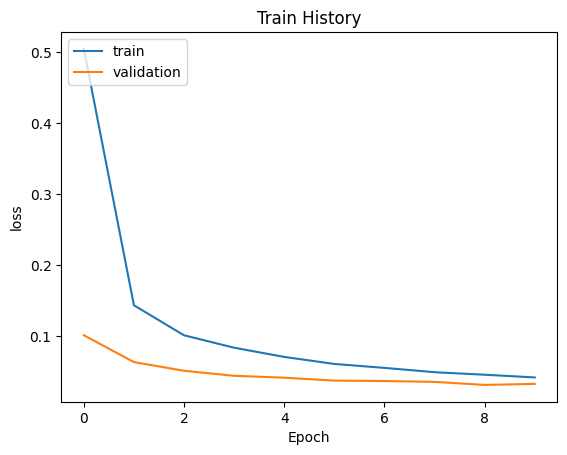

In [12]:
show_train_history(train_history, 'loss', 'val_loss')

# 評估模型準確率與進行預測

### 評估模型準確率

In [13]:
scores=model.evaluate(X_Test4D_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 4s 12ms/step - loss: 0.0245 - accuracy: 0.9915

	[Info] Accuracy of testing data = 99.2%


In [14]:
scores

[0.024519866332411766, 0.9915000200271606]

### 預測結果

In [18]:
print("\t[Info] Making prediction of X_Test4D_norm")
predict_x=model.predict(X_Test4D_norm) # Making prediction and save result to prediction
classes_x=np.argmax(predict_x, axis=1)
print()
print("\t[Info] Show 20 prediction result (From 240):")
print("%s\n" % (classes_x[240:260]))

	[Info] Making prediction of X_Test4D_norm
313/313 [==============================] - 5s 17ms/step

	[Info] Show 20 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2 6]



### 顯示前 20 筆預測結果

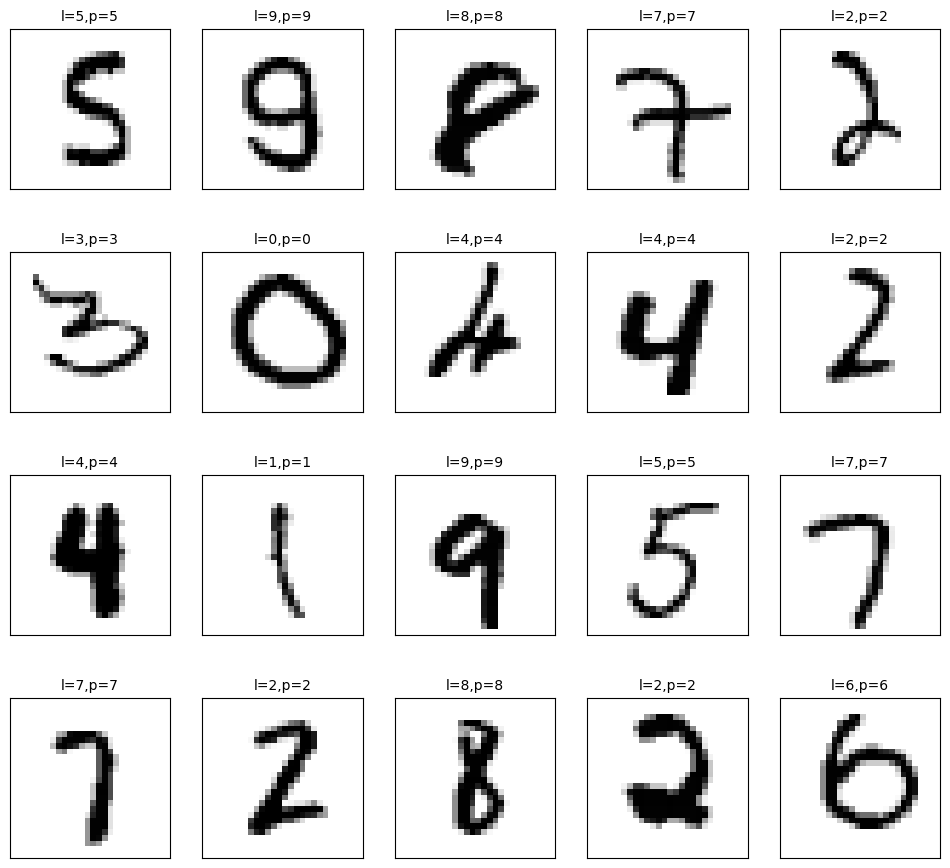

In [17]:
plot_images_labels_predict(X_Test, y_Test, classes_x, idx=240)

### 顯示混淆矩陣（Confusion matrix）

In [19]:
print("\t[Info] Display Confusion Matrix:")
import pandas as pd
print("%s\n" % pd.crosstab(y_Test, classes_x, rownames=['label'], colnames=['predict']))

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     1     0     0    0    0    1     1    1    0
1          0  1132     1     0    0    0    0     0    2    0
2          4     1  1025     0    0    0    0     2    0    0
3          0     0     0  1005    0    1    0     1    2    1
4          0     0     1     0  978    0    0     0    1    2
5          2     1     0     4    0  883    1     0    0    1
6          4     3     0     0    2    3  945     0    1    0
7          0     2     4     2    1    0    0  1016    1    2
8          4     1     1     1    3    1    0     1  958    4
9          0     1     0     0    5    2    0     4    0  997

